In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

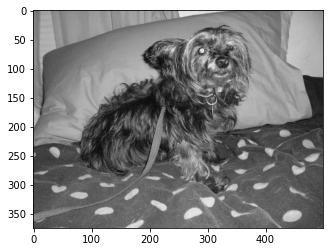

In [2]:
datadir = 'E:/BAD/hard code/dog-cat/PetImages'
cate = ['dog', 'cat']

for category in cate:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr, cmap = 'gray')
        plt.show()
        break
    break

In [3]:


img_arr



array([[117, 117, 119, ..., 133, 132, 132],
       [118, 117, 119, ..., 135, 134, 134],
       [119, 118, 120, ..., 137, 136, 136],
       ...,
       [ 79,  74,  73, ...,  80,  76,  73],
       [ 78,  72,  69, ...,  72,  73,  74],
       [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8)

In [4]:
img_arr.shape

(375, 500)

In [5]:
type(img_arr)

numpy.ndarray

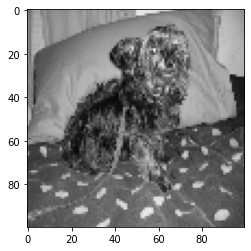

In [6]:
img_size = 100
img_arr = cv2.resize(img_arr, (img_size, img_size))
plt.imshow(img_arr, cmap = 'gray')
plt.show()

In [7]:
datadir = 'E:/BAD/hard code/dog-cat/PetImages'
cate = ['dog', 'cat']

def create_train_data():
    training_data = []
    img_size = 100
    img_arr = []

    for category in cate:
        path = os.path.join(datadir, category)
        class_num = cate.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.resize(img_arr, (img_size, img_size))
                training_data.append([img_arr, class_num])
            except Exception as e:
                pass  


    return training_data  




training_data = create_train_data()
print(len(training_data))

100%|██████████| 12501/12501 [01:10<00:00, 177.81it/s]24946



In [8]:
import random
random.shuffle(training_data)

In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [11]:
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [14]:
import pickle
pic = open('X.pickle', 'wb')
pickle.dump(X, pic)
pic.close()

pic = open('y.pickle', 'wb')
pickle.dump(y, pic)
pic.close()

In [21]:
import pickle

pic = open('X.pickle', 'rb')
X = pickle.load(pic)
pic.close()

pic = open('y.pickle', 'rb')
y = pickle.load(pic)
pic.close()

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import normalize

In [24]:
X = normalize(X, axis = 1)

In [25]:
X[0]

array([[[0.12274572],
        [0.12078545],
        [0.11847528],
        ...,
        [0.10756056],
        [0.10745864],
        [0.10748004]],

       [[0.12274572],
        [0.12078545],
        [0.11847528],
        ...,
        [0.10756056],
        [0.10745864],
        [0.10748004]],

       [[0.12274572],
        [0.12078545],
        [0.11847528],
        ...,
        [0.10756056],
        [0.10745864],
        [0.10748004]],

       ...,

       [[0.02962828],
        [0.06747325],
        [0.08114745],
        ...,
        [0.06691268],
        [0.05935216],
        [0.05623955]],

       [[0.04401915],
        [0.07247127],
        [0.07546713],
        ...,
        [0.05315493],
        [0.05997692],
        [0.05748932]],

       [[0.05756351],
        [0.07247127],
        [0.07384418],
        ...,
        [0.06065915],
        [0.06372547],
        [0.06936212]]])

In [26]:
X.shape

(24946, 100, 100, 1)

In [27]:
model = Sequential()

model.add(Conv2D(filters = 256, kernel_size = (3, 3), input_shape = X.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X, y, batch_size = 32, epochs = 3, validation_split = 0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 [==============================] - 92s 5ms/sample - loss: 0.6753 - accuracy: 0.5672 - val_loss: 0.6461 - val_accuracy: 0.6224
Epoch 2/3
17462/17462 [==============================] - 90s 5ms/sample - loss: 0.6273 - accuracy: 0.6452 - val_loss: 0.6094 - val_accuracy: 0.6605
Epoch 3/3
17462/17462 [==============================] - 90s 5ms/sample - loss: 0.6005 - accuracy: 0.6708 - val_loss: 0.6086 - val_accuracy: 0.6746
